#  Weather prediction Algorithm based on Kalman filter

## Case 1 : Prediction based on Kalman filter ( Non-linear correction With Quadratic coefficent)

Model prediction for 2nd degree polynomial regression
Absolute Bias of the Temperature Forecasted model =  1.6266666666666665
Absolute Bias of the Kalman Predicted model  =  1.4843983075946636
Absolute Bias of the wind speed Forecasted model =  2.1466666666666665
Absolute Bias of the wind speed Kalman Predicted model  =  1.807502570954046


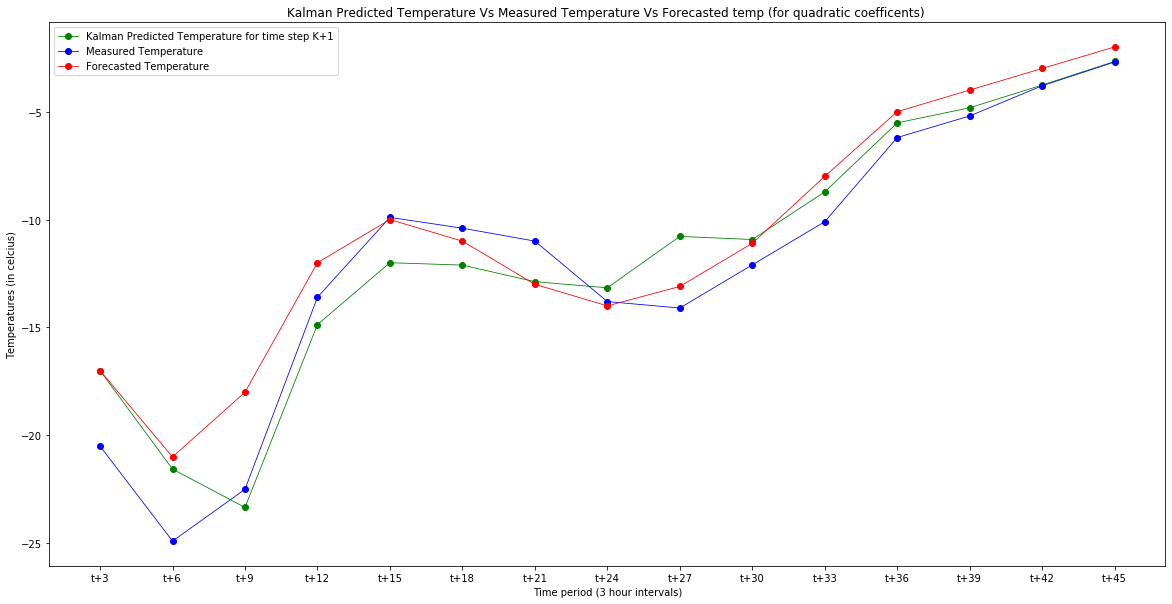

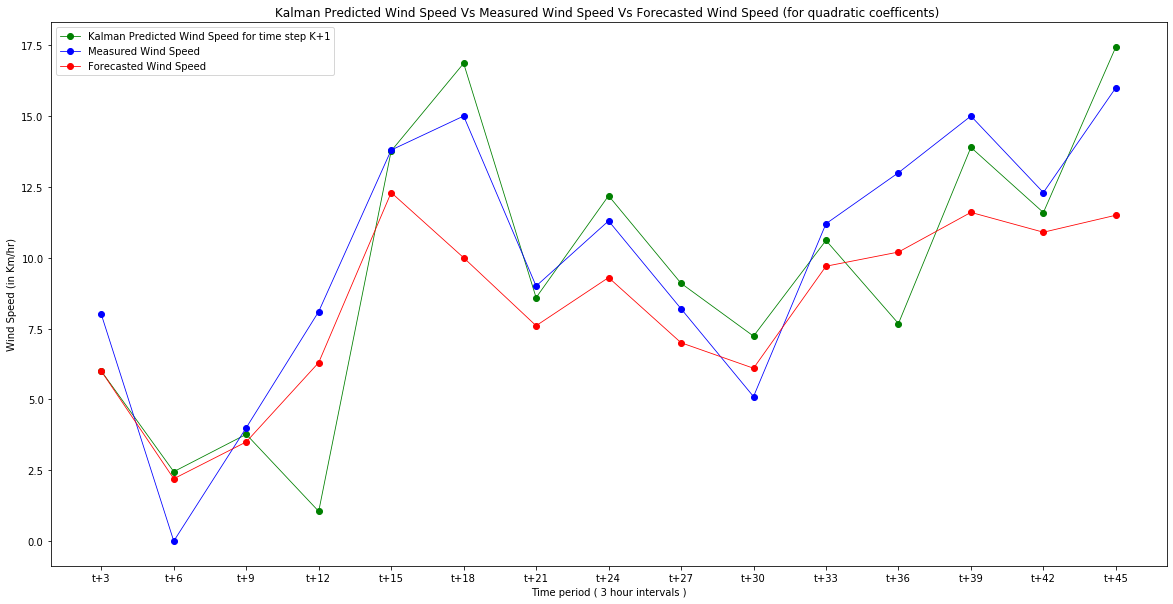

In [4]:
import numpy as np
np.set_printoptions(threshold=3)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import random
from numpy import dot
from sklearn.metrics import mean_absolute_error

def prediction(X_hat_t_1,P_t_1,F_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)
    P_hat_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_hat_t
    
def update(X_hat_t,P_t,Z_t,R_t,H_t,H_t_transpose):
    
    
    K_inv = (np.linalg.inv (( H_t*(P_t*H_t_transpose)) +R_t ) )
    K_prime= (P_t*H_t_transpose)*K_inv
    X_t=X_hat_t+K_prime*(Z_t-(H_t*(X_hat_t)))
    P_t=P_t-K_prime*(H_t)*(P_t)
        
    return X_t,P_t
  
#Forecasted temperature data at 3 hour intervals from (https://weather.com/en-CA/weather)

Temp_F =(-16,-17,-21,-18,-12,-10,-11,-13,-14,-13.1,-11.1,-8,-5,-4,-3,-2,-3.6)
Time_F = ['t+0','t+3','t+6','t+9','t+12','t+15','t+18','t+21','t+24','t+27','t+30','t+33','t+36','t+39','t+42','t+45','t+48','t+51']

#Measured temperature data at 3 hour intervals from (https://climate.weather.gc.ca/climate_data/)

Temp_M = (-16.5,-20.5,-24.9,-22.5,-13.6,-9.9,-10.4,-11.0,-13.8,-14.1,-12.1,-10.1,-6.2,-5.2,-3.8,-2.7) 

#Forecasted Wind speed data at hour intervals from (https://weather.com/en-CA/weather)

Wind_Speed_F = (12,6,2.2,3.5,6.3,12.3,10,7.6,9.3,7,6.1,9.7,10.2,11.6,10.9,11.5,13.7)
Time_F = ['t+3','t+6','t+9','t+12','t+15','t+18','t+21','t+24','t+27','t+30','t+33','t+36','t+39','t+42','t+45','t+48','t+51']

#Measured Wind Speed data at 3 hour intervals from (https://climate.weather.gc.ca/climate_data/)
Wind_Speed_M = (13,8,0,4,8.1,13.8,15,9,11.3,8.2,5.1,11.2,13,15,12.3,16)

k = len(Temp_M)
f = len(Temp_F)

g = len(Wind_Speed_F)
h = len(Wind_Speed_M)

# State Transition matrix 
F_t=np.array([ [1 ,0, 0] , [0,1,0] , [0,0,1]])
 
#Initial State cov
P_t= np.identity(3)
 
#Process covariance matrix 
Q_t= ([ [0.1 ,0, 0] , [0,0.1,0] , [0,0,0.1]])

# Regression Coeffiecents (Initial state)
a_0 = 0
a_1= 0
a_2 = 0

#Measurment cov
R_t= [0.4]
 
# Initial State
X_hat_t = np.array ([ [(a_0),0, 0] , [0,(a_1),0] , [0,0,(a_2)]])
predicted =[] 
# Non-linear correction of temperature
for j in (Temp_M):
    for i in (Temp_F):
        if (Temp_M.index(j)== Temp_F.index(i)):
            H_t = [[ 1, i , i*i ]]
            H_t_transpose = ([1], [i] , [i*i ])
            X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,Q_t)
            Z_t=j-i
            L_t = dot(H_t,X_hat_t)
            M_t = dot(L_t,([0 ,0,1]))
            predicted.append(M_t)
            X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t,H_t_transpose)        
            X_hat_t=X_t
            P_hat_t=P_t

Predicted_temp = []
#Correction error is calculated by the algorithm and added to the temperature forecast value for the next time step
for i in range(0, len(predicted)): 
    Predicted_temp.append(predicted[i] + Temp_F[i+1])
plt.figure(figsize=(20,10))
plt.plot(Time_F[0:15], Predicted_temp[0:15] ,'ro-',color='green', linewidth=0.8, label="Kalman Predicted Temperature for time step K+1")
plt.plot(Time_F[0:15],Temp_M[1:16] ,'ro-',color='blue', linewidth=0.8,label="Measured Temperature")
plt.plot(Time_F[0:15],Temp_F[1:16],'ro-', linewidth=0.8, label="Forecasted Temperature")
plt.legend()
plt.title('Kalman Predicted Temperature Vs Measured Temperature Vs Forecasted temp (for quadratic coefficents) ')
plt.xlabel('Time period (3 hour intervals)')
plt.ylabel('Temperatures (in celcius)')
print('Model prediction for 2nd degree polynomial regression')
print('===========================================================================')

    
#Comparing the absolute bias of the forecast model and kalman predicted model 
Bias_forecast_model = mean_absolute_error(Temp_F[1:16],Temp_M[1:16])
print('Absolute Bias of the Temperature Forecasted model = ',Bias_forecast_model)
Bias_predicted_model = mean_absolute_error(Predicted_temp[0:15],Temp_M[1:16])
print('Absolute Bias of the Kalman Predicted model  = ',Bias_predicted_model)
print('===========================================================================')


# State Transition matrix 
F_t=np.array([ [1 ,0, 0] , [0,1,0] , [0,0,1]])
 
#Initial State cov
P_t= np.identity(3)
 
#Process covariance matrix 
Q_t= ([ [0.1 ,0, 0] , [0,0.1,0] , [0,0,0.1]])

# Regression Coeffiecents (Initial state)
a_0 = 0
a_1= 0
a_2 = 0

#Measurment cov
R_t= [0.4]
 
# Initial State
X_hat_t = np.array ([ [(a_0),0, 0] , [0,(a_1),0] , [0,0,(a_2)]])

# Non-linear correction of Wind Speed
predicted_W =[] 
for j in (Wind_Speed_M):
    for i in (Wind_Speed_F):
        if (Wind_Speed_M.index(j)== Wind_Speed_F.index(i)):
            H_t = [[ 1, i , i*i ]]
            H_t_transpose = ([1], [i] , [i*i ])
            X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,Q_t)
            Z_t=j-i
            L_t = dot(H_t,X_hat_t)
            M_t = dot(L_t,([0,0,1]))
            predicted_W.append(M_t)
            X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t,H_t_transpose) 
            X_hat_t=X_t
            P_hat_t=P_t
            
Predicted_Wind_Speed = []

for i in range(0, len(predicted_W)): 
    Predicted_Wind_Speed.append(predicted_W[i] + Wind_Speed_F[i+1])
plt.figure(figsize=(20,10))
plt.plot(Time_F[0:15], Predicted_Wind_Speed[0:15] ,'ro-',color='green', linewidth=0.8, label="Kalman Predicted Wind Speed for time step K+1")
plt.plot(Time_F[0:15],Wind_Speed_M[1:16] ,'ro-',color='blue', linewidth=0.8,label="Measured Wind Speed")
plt.plot(Time_F[0:15],Wind_Speed_F[1:16],'ro-', linewidth=0.8, label="Forecasted Wind Speed")
plt.legend()
plt.title('Kalman Predicted Wind Speed Vs Measured Wind Speed Vs Forecasted Wind Speed (for quadratic coefficents) ')
plt.xlabel('Time period ( 3 hour intervals )')
plt.ylabel('Wind Speed (in Km/hr)')
print('===========================================================================')

#Comparing the absolute bias of the forecast model and kalman predicted model 
Bias_forecast_model = mean_absolute_error(Wind_Speed_F[1:16],Wind_Speed_M[1:16])
print('Absolute Bias of the wind speed Forecasted model = ',Bias_forecast_model)
Bias_predicted_model = mean_absolute_error(Predicted_Wind_Speed [0:15],Wind_Speed_M[1:16])
print('Absolute Bias of the wind speed Kalman Predicted model  = ',Bias_predicted_model)
print('===========================================================================')


### Case 2 : Prediction based on Kalman filter ( With 3 degree coefficent)

Model prediction for 3rd degree polynomial regression
Absolute Bias of the Temperature Forecasted model =  1.6266666666666665
Absolute Bias of the Kalman Predicted model  =  1.5610715866982396
Absolute Bias of the wind speed Forecasted model =  2.2933333333333334
Absolute Bias of the wind speed Kalman Predicted model  =  2.2915227971495122


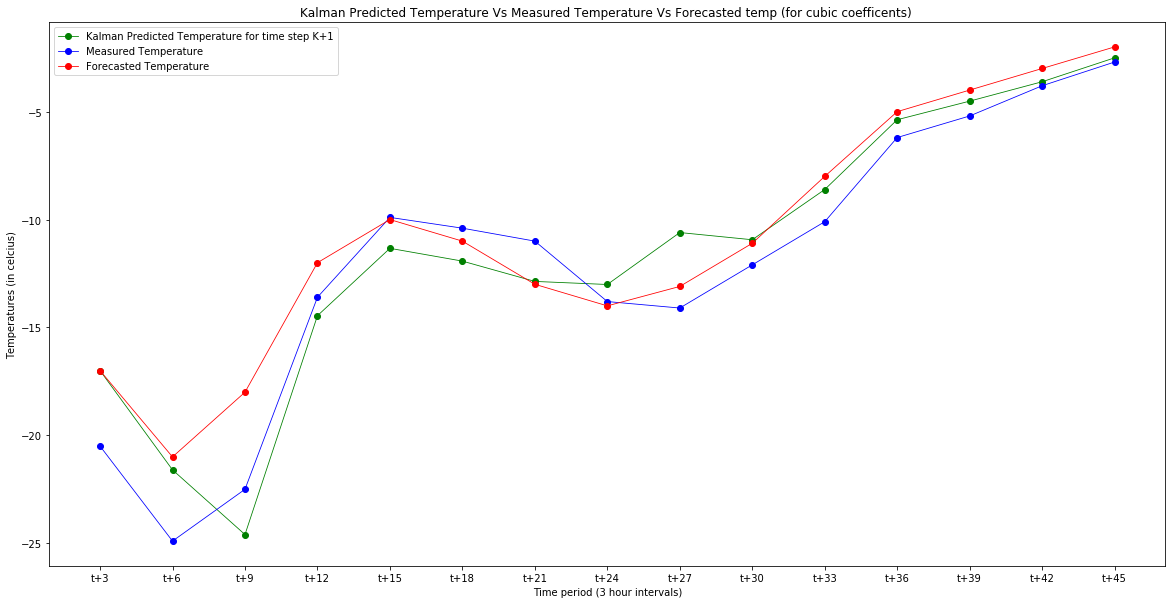

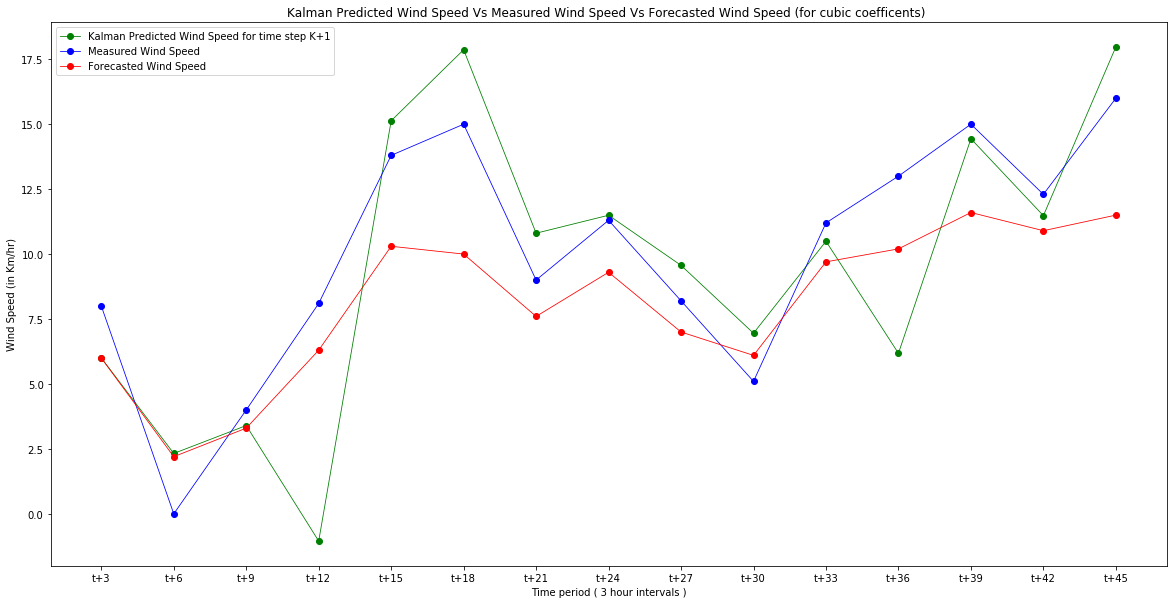

In [74]:
import numpy as np
np.set_printoptions(threshold=3)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import random
from numpy import dot

def prediction(X_hat_t_1,P_t_1,F_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    
def update(X_hat_t,P_t,Z_t,R_t,H_t,H_t_transpose):
    
    
    K_inv = (np.linalg.inv (( H_t*(P_t*H_t_transpose)) +R_t ) )
  
    K_prime= (P_t*H_t_transpose)*K_inv
 
    X_t=X_hat_t+K_prime*(Z_t-(H_t*(X_hat_t)))
                    
    P_t=P_t-K_prime*(H_t)*(P_t)
        
    return X_t,P_t
  
#Forecasted temperature data at 3 hour intervals  (https://weather.com/en-CA/weather)

Temp_F =(-16,-17,-21,-18,-12,-10,-11,-13,-14,-13.1,-11.1,-8,-5,-4,-3,-2,-3.6)
Time_F = ['t+0','t+3','t+6','t+9','t+12','t+15','t+18','t+21','t+24','t+27','t+30','t+33','t+36','t+39','t+42','t+45','t+48','t+51']

#Measured temperature data at 3 hour intervals (https://climate.weather.gc.ca/climate_data/)
Temp_M = (-16.5,-20.5,-24.9,-22.5,-13.6,-9.9,-10.4,-11.0,-13.8,-14.1,-12.1,-10.1,-6.2,-5.2,-3.8,-2.7) 

#Forecasted Wind speed data at hour intervals from (https://weather.com/en-CA/weather)
Wind_Speed_F = (12,6,2.2,3.3,6.3,10.3,10,7.6,9.3,7,6.1,9.7,10.2,11.6,10.9,11.5,13.7)
Time_F = ['t+3','t+6','t+9','t+12','t+15','t+18','t+21','t+24','t+27','t+30','t+33','t+36','t+39','t+42','t+45','t+48','t+51']

#Measured Wind Speed data at 3 hour intervals from (https://climate.weather.gc.ca/climate_data/)
Wind_Speed_M = (13,8,0,4,8.1,13.8,15,9,11.3,8.2,5.1,11.2,13,15,12.3,16)

k = len(Temp_M)
f = len(Temp_F)

# State Transition matrix
F_t=np.array([ [1 ,0, 0,0] , [0,1,0,0] , [0,0,1,0],[0,0,0,1]])
 
#Initial State covariance matrix
P_t= np.identity(4)
 
#Process covariance matrix
Q_t= ([ [0.01 ,0, 0, 0] , [0,0.5,0,0] , [0,0,0.1,0],[0,0,0,0.1]])

# Regression Coeffiecents (Initial state)
a_0 = 0
a_1= 0
a_2 = 0
a_3 = 0

#Measurment covariance matrix
R_t= [0.4]
 
# Initial State
X_hat_t = np.array ([ [(a_0) ,0, 0,0] , [0,(a_1),0,0] , [0,0,(a_2),0],[0,0,0,(a_3)]])

predicted =[] 
for j in (Temp_M):
    for i in (Temp_F):
        if (Temp_M.index(j)== Temp_F.index(i)):
            H_t = [ [1, i , i*i ,i*i*i]]
            H_t_transpose = ([1], [i] , [i*i ],[i*i*i])
            X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,Q_t)
            Z_t=j-i
            L_t = dot(H_t,X_hat_t)
            M_t = dot(L_t,([0 ,0,0,1]))
            predicted.append(M_t) 
            X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t,H_t_transpose)
            X_hat_t=X_t
            P_hat_t=P_t
Predicted_temp = []

#Correction error is calculated by the algorithm and added to the temperature forecast value for the next time step
for i in range(0, len(predicted)): 
    Predicted_temp.append(predicted[i] + Temp_F[i+1])
plt.figure(figsize=(20,10))
plt.plot(Time_F[0:15], Predicted_temp[0:15] ,'ro-',color='green', linewidth=0.8, label="Kalman Predicted Temperature for time step K+1")
plt.plot(Time_F[0:15],Temp_M[1:16] ,'ro-',color='blue', linewidth=0.8,label="Measured Temperature")
plt.plot(Time_F[0:15],Temp_F[1:16],'ro-', linewidth=0.8, label="Forecasted Temperature")
plt.legend()
plt.title('Kalman Predicted Temperature Vs Measured Temperature Vs Forecasted temp (for cubic coefficents) ')
plt.xlabel('Time period (3 hour intervals)')
plt.ylabel('Temperatures (in celcius)')
print('Model prediction for 3rd degree polynomial regression')
print('===========================================================================')

    
#Comparing the absolute bias of the forecast model and kalman predicted model 
Bias_forecast_model = mean_absolute_error(Temp_F[1:16],Temp_M[1:16])
print('Absolute Bias of the Temperature Forecasted model = ',Bias_forecast_model)
Bias_predicted_model = mean_absolute_error(Predicted_temp[0:15],Temp_M[1:16])
print('Absolute Bias of the Kalman Predicted model  = ',Bias_predicted_model)
print('===========================================================================')

# State Transition matrix
F_t=np.array([ [1 ,0, 0,0] , [0,1,0,0] , [0,0,1,0],[0,0,0,1]])
 
#Initial State covariance matrix
P_t= np.identity(4)
 
#Process covariance matrix
Q_t= ([ [0.01 ,0, 0, 0] , [0,0.5,0,0] , [0,0,0.1,0],[0,0,0,0.1]])

# Regression Coeffiecents (Initial state)
a_0 = 0
a_1= 0
a_2 = 0
a_3 = 0

#Measurment covariance matrix
R_t= [0.4]
 
# Initial State
X_hat_t = np.array ([ [(a_0) ,0, 0,0] , [0,(a_1),0,0] , [0,0,(a_2),0],[0,0,0,(a_3)]])

# Non-linear correction of Wind Speed
predicted_W =[] 
for j in (Wind_Speed_M):
    for i in (Wind_Speed_F):
        if (Wind_Speed_M.index(j)== Wind_Speed_F.index(i)):
            H_t = [ [1, i , i*i ,i*i*i]]
            H_t_transpose = ([1], [i] , [i*i ],[i*i*i])
            X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,Q_t)
            Z_t=j-i
            L_t = dot(H_t,X_hat_t)
            M_t = dot(L_t,([0,0,0,1]))
            predicted_W.append(M_t)
            X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t,H_t_transpose) 
            X_hat_t=X_t
            P_hat_t=P_t
            
Predicted_Wind_Speed = []

for i in range(0, len(predicted_W)): 
    Predicted_Wind_Speed.append(predicted_W[i] + Wind_Speed_F[i+1])
plt.figure(figsize=(20,10))
plt.plot(Time_F[0:15], Predicted_Wind_Speed[0:15] ,'ro-',color='green', linewidth=0.8, label="Kalman Predicted Wind Speed for time step K+1")
plt.plot(Time_F[0:15],Wind_Speed_M[1:16] ,'ro-',color='blue', linewidth=0.8,label="Measured Wind Speed")
plt.plot(Time_F[0:15],Wind_Speed_F[1:16],'ro-', linewidth=0.8, label="Forecasted Wind Speed")
plt.legend()
plt.title('Kalman Predicted Wind Speed Vs Measured Wind Speed Vs Forecasted Wind Speed (for cubic coefficents) ')
plt.xlabel('Time period ( 3 hour intervals )')
plt.ylabel('Wind Speed (in Km/hr)')
print('===========================================================================')

#Comparing the absolute bias of the forecast model and kalman predicted model 
Bias_forecast_model = mean_absolute_error(Wind_Speed_F[1:16],Wind_Speed_M[1:16])
print('Absolute Bias of the wind speed Forecasted model = ',Bias_forecast_model)
Bias_predicted_model = mean_absolute_error(Predicted_Wind_Speed [0:15],Wind_Speed_M[1:16])
print('Absolute Bias of the wind speed Kalman Predicted model  = ',Bias_predicted_model)
print('===========================================================================')

    

### Case 2 : Prediction based on Kalman filter ( With 4 degree coefficent)


Model prediction for 4th degree polynomial regression
Absolute Bias of the Temperature Forecasted model =  1.66
Absolute Bias of the Kalman Predicted model  =  1.6307347869562785
Absolute Bias of the wind speed Forecasted model =  2.2933333333333334
Absolute Bias of the wind speed Kalman Predicted model  =  3.3802321633393273


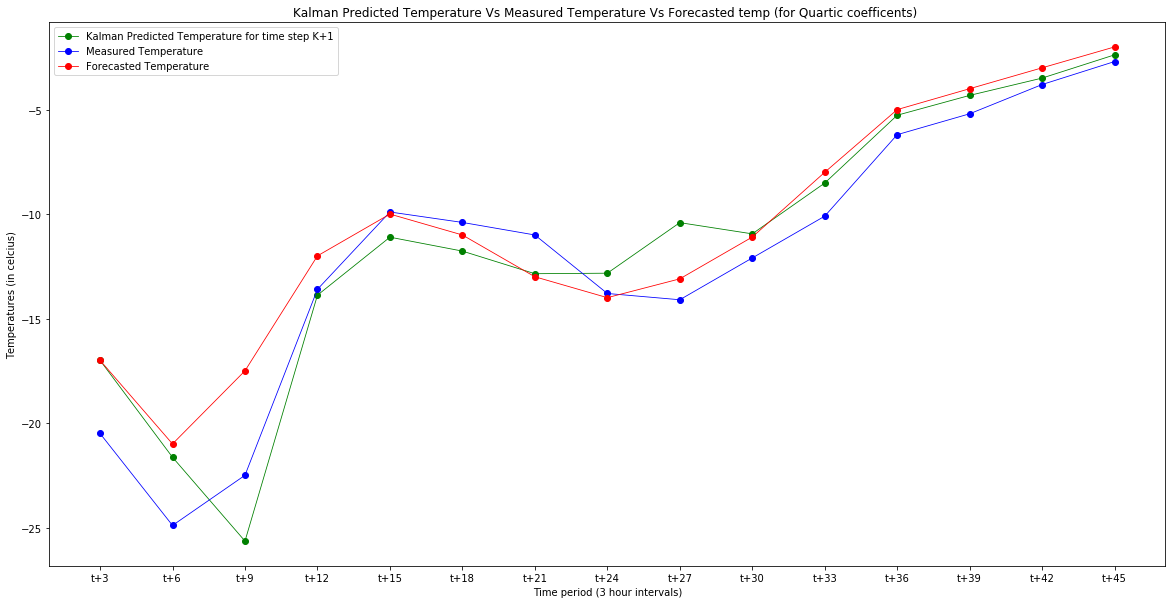

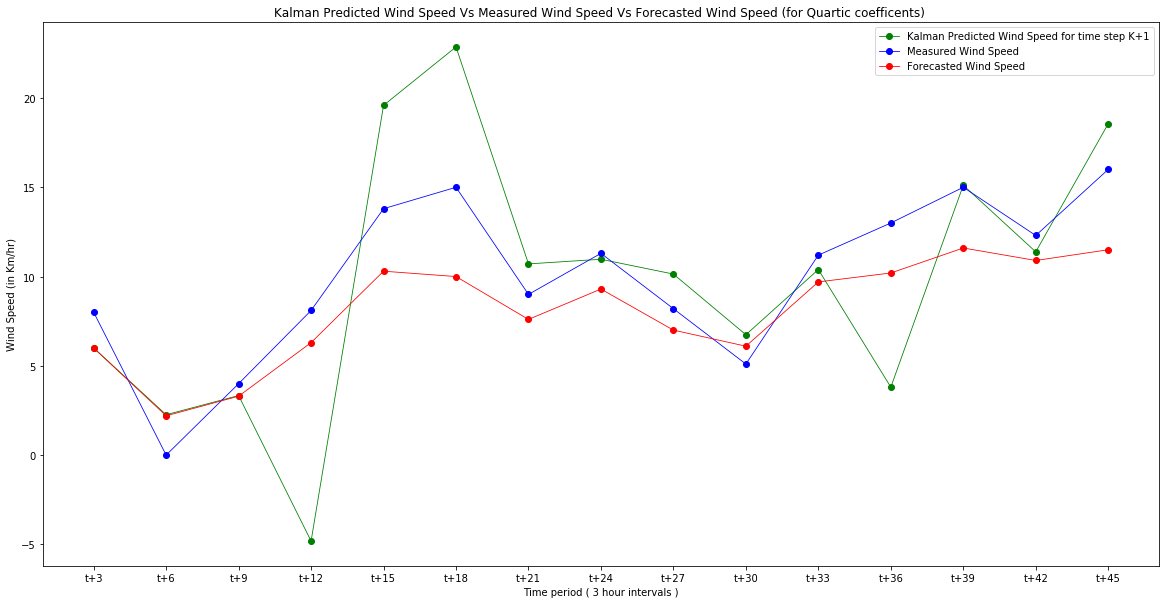

In [75]:
import numpy as np
np.set_printoptions(threshold=3)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from numpy import dot
import statistics

def prediction(X_hat_t_1,P_t_1,F_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    
def update(X_hat_t,P_t,Z_t,R_t,H_t,H_t_transpose):
    
    
    K_inv = (np.linalg.inv (( H_t*(P_t*H_t_transpose)) +R_t ) )
  
    K_prime= (P_t*H_t_transpose)*K_inv
 
    X_t=X_hat_t+K_prime*(Z_t-(H_t*(X_hat_t)))
                    
    P_t=P_t-K_prime*(H_t)*(P_t)
        
    return X_t,P_t
  
#Forecasted temperature data at 3 hour intervals(Feb14 & Feb15) 

Temp_F =(-16,-17,-21,-17.5,-12,-10,-11,-13,-14,-13.1,-11.1,-8,-5,-4,-3,-2,-3.6)
Time_F = ['t+0','t+3','t+6','t+9','t+12','t+15','t+18','t+21','t+24','t+27','t+30','t+33','t+36','t+39','t+42','t+45','t+48','t+51']

#Measured temperature data at 3 hour intervals(Feb14 & Feb15) 
Temp_M = (-16.5,-20.5,-24.9,-22.5,-13.6,-9.9,-10.4,-11.0,-13.8,-14.1,-12.1,-10.1,-6.2,-5.2,-3.8,-2.7) 

#Forecasted Wind speed data at hour intervals from (https://weather.com/en-CA/weather)
Wind_Speed_F = (12,6,2.2,3.3,6.3,10.3,10,7.6,9.3,7,6.1,9.7,10.2,11.6,10.9,11.5,13.7)
Time_F = ['t+3','t+6','t+9','t+12','t+15','t+18','t+21','t+24','t+27','t+30','t+33','t+36','t+39','t+42','t+45','t+48','t+51']
k = len(Temp_M)
f = len(Temp_F)

# State Transition matrix
F_t=np.array([ [1 ,0, 0,0,0] , [0,1,0,0,0] , [0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
 
#Initial State covariance matrix
P_t= np.identity(5)
 
#Process covariance matrix
Q_t= ([ [0.01 ,0, 0, 0,0] , [0,0.5,0,0,0] , [0,0,0.1,0,0],[0,0,0,0.1,0],[0,0,0,0,0.1]])

# Regression Coeffiecents (Initial state)
a_0 = 0
a_1= 0
a_2 = 0
a_3 = 0
a_4 = 0

#Measurment covariance matrix
R_t= [0.4]
 
# Initial State
X_hat_t = np.array ([ [0 ,0, 0,0,0] , [0,0,0,0,0] , [0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])

predicted =[] 
for j in (Temp_M):
    for i in (Temp_F):
        if (Temp_M.index(j)== Temp_F.index(i)):
            H_t = [ [1, i , i*i ,i*i*i,i*i*i*i]]
            H_t_transpose = ([1], [i] , [i*i ],[i*i*i],[i*i*i*i])
            X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,Q_t)
            Z_t=j-i
            L_t = dot(H_t,X_hat_t)
            M_t = dot(L_t,([0 ,0,0,0,1]))
            predicted.append(M_t) 
            X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t,H_t_transpose)
            X_hat_t=X_t
            P_hat_t=P_t
Predicted_temp = []

#Correction error is calculated by the algorithm and added to the temperature forecast value for the next time step
for i in range(0, len(predicted)): 
    Predicted_temp.append(predicted[i] + Temp_F[i+1])
plt.figure(figsize=(20,10))
plt.plot(Time_F[0:15], Predicted_temp[0:15] ,'ro-',color='green', linewidth=0.8, label="Kalman Predicted Temperature for time step K+1")
plt.plot(Time_F[0:15],Temp_M[1:16] ,'ro-',color='blue', linewidth=0.8,label="Measured Temperature")
plt.plot(Time_F[0:15],Temp_F[1:16],'ro-', linewidth=0.8, label="Forecasted Temperature")
plt.legend()
plt.title('Kalman Predicted Temperature Vs Measured Temperature Vs Forecasted temp (for Quartic coefficents) ')
plt.xlabel('Time period (3 hour intervals)')
plt.ylabel('Temperatures (in celcius)')
print('Model prediction for 4th degree polynomial regression')
print('===========================================================================')

    
#Comparing the absolute bias of the forecast model and kalman predicted model 
Bias_forecast_model = mean_absolute_error(Temp_F[1:16],Temp_M[1:16])
print('Absolute Bias of the Temperature Forecasted model = ',Bias_forecast_model)
Bias_predicted_model = mean_absolute_error(Predicted_temp[0:15],Temp_M[1:16])
print('Absolute Bias of the Kalman Predicted model  = ',Bias_predicted_model)
print('===========================================================================')

# State Transition matrix
F_t=np.array([ [1 ,0, 0,0,0] , [0,1,0,0,0] , [0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
 
#Initial State covariance matrix
P_t= np.identity(5)
 
#Process covariance matrix
Q_t= ([ [0.01 ,0, 0, 0,0] , [0,0.5,0,0,0] , [0,0,0.1,0,0],[0,0,0,0.1,0],[0,0,0,0,0.1]])

# Regression Coeffiecents (Initial state)
a_0 = 0
a_1= 0
a_2 = 0
a_3 = 0
a_4 = 0

#Measurment covariance matrix
R_t= [0.4]
 
# Initial State
X_hat_t = np.array ([ [0 ,0, 0,0,0] , [0,0,0,0,0] , [0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])

# Non-linear correction of Wind Speed
predicted_W =[] 
for j in (Wind_Speed_M):
    for i in (Wind_Speed_F):
        if (Wind_Speed_M.index(j)== Wind_Speed_F.index(i)):
            H_t = [ [1, i , i*i ,i*i*i,i*i*i*i]]
            H_t_transpose = ([1], [i] , [i*i ],[i*i*i],[i*i*i*i])
            X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,Q_t)
            Z_t=j-i
            L_t = dot(H_t,X_hat_t)
            M_t = dot(L_t,([0 ,0,0,0,1]))
            predicted_W.append(M_t)
            X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t,H_t_transpose) 
            X_hat_t=X_t
            P_hat_t=P_t
            
Predicted_Wind_Speed = []

for i in range(0, len(predicted_W)): 
    Predicted_Wind_Speed.append(predicted_W[i] + Wind_Speed_F[i+1])
plt.figure(figsize=(20,10))
plt.plot(Time_F[0:15], Predicted_Wind_Speed[0:15] ,'ro-',color='green', linewidth=0.8, label="Kalman Predicted Wind Speed for time step K+1")
plt.plot(Time_F[0:15],Wind_Speed_M[1:16] ,'ro-',color='blue', linewidth=0.8,label="Measured Wind Speed")
plt.plot(Time_F[0:15],Wind_Speed_F[1:16],'ro-', linewidth=0.8, label="Forecasted Wind Speed")
plt.legend()
plt.title('Kalman Predicted Wind Speed Vs Measured Wind Speed Vs Forecasted Wind Speed (for Quartic coefficents) ')
plt.xlabel('Time period ( 3 hour intervals )')
plt.ylabel('Wind Speed (in Km/hr)')
print('===========================================================================')

#Comparing the absolute bias of the forecast model and kalman predicted model 
Bias_forecast_model = mean_absolute_error(Wind_Speed_F[1:16],Wind_Speed_M[1:16])
print('Absolute Bias of the wind speed Forecasted model = ',Bias_forecast_model)
Bias_predicted_model = mean_absolute_error(Predicted_Wind_Speed [0:15],Wind_Speed_M[1:16])
print('Absolute Bias of the wind speed Kalman Predicted model  = ',Bias_predicted_model)
print('===========================================================================')
    

## Analysis :-
## There is an overall increase in the absolute bias of the predicted model, when quartic and cubic coefficients are considered in the case of predicted temperature model.
## While in the case of wind speed model, the predicted model performs worse when quartic coeffeicents are considered.
## From the above three cases, it is fairly conclusive as to why non-linear correction gives the best output on both of the predicted models when a quadratic coefficient is considered.